In [1]:
!pip install pandas jsonlines

### Bibliography Data Visualization

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/bibliography_style.csv', encoding='latin-1')  # Replace with your actual file path

## Citation Style vs. Citation Type

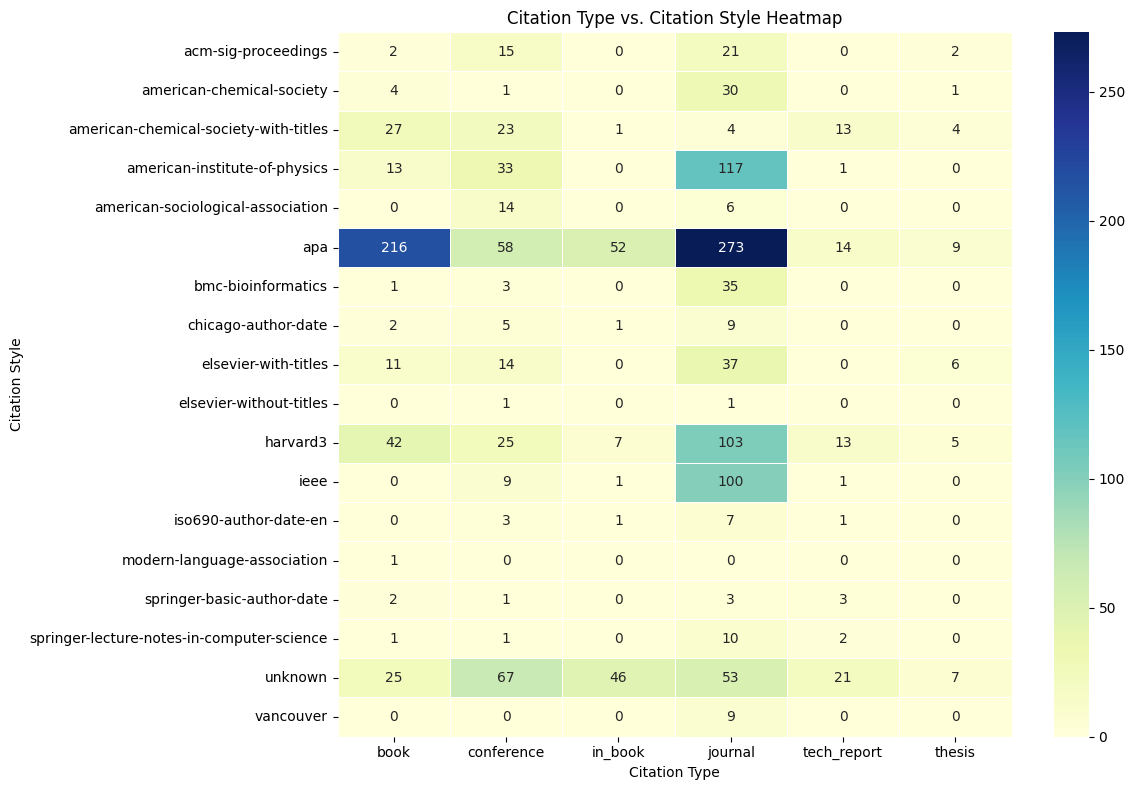

In [8]:
citestyle_type = pd.crosstab(df['CitationStyle'], df['Mannual_ann'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(citestyle_type, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Citation Type vs. Citation Style Heatmap')
plt.xlabel('Citation Type')
plt.ylabel('Citation Style')
plt.tight_layout()
plt.show()

## Discipline vs. Citation Style

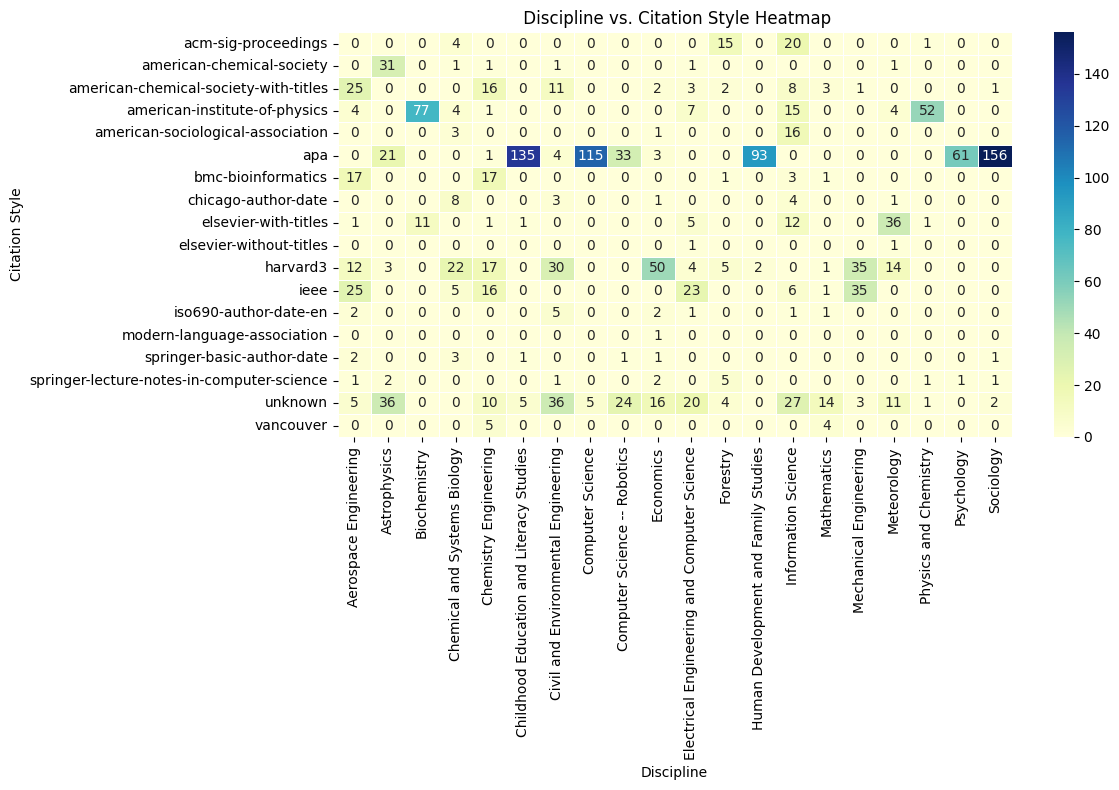

In [12]:
citestyle_discipline = pd.crosstab(df['CitationStyle'], df['Discipline'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(citestyle_discipline, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title(' Discipline vs. Citation Style Heatmap')
plt.xlabel('Discipline')
plt.ylabel('Citation Style')
plt.tight_layout()
plt.show()

## Discipline vs. Citation Type

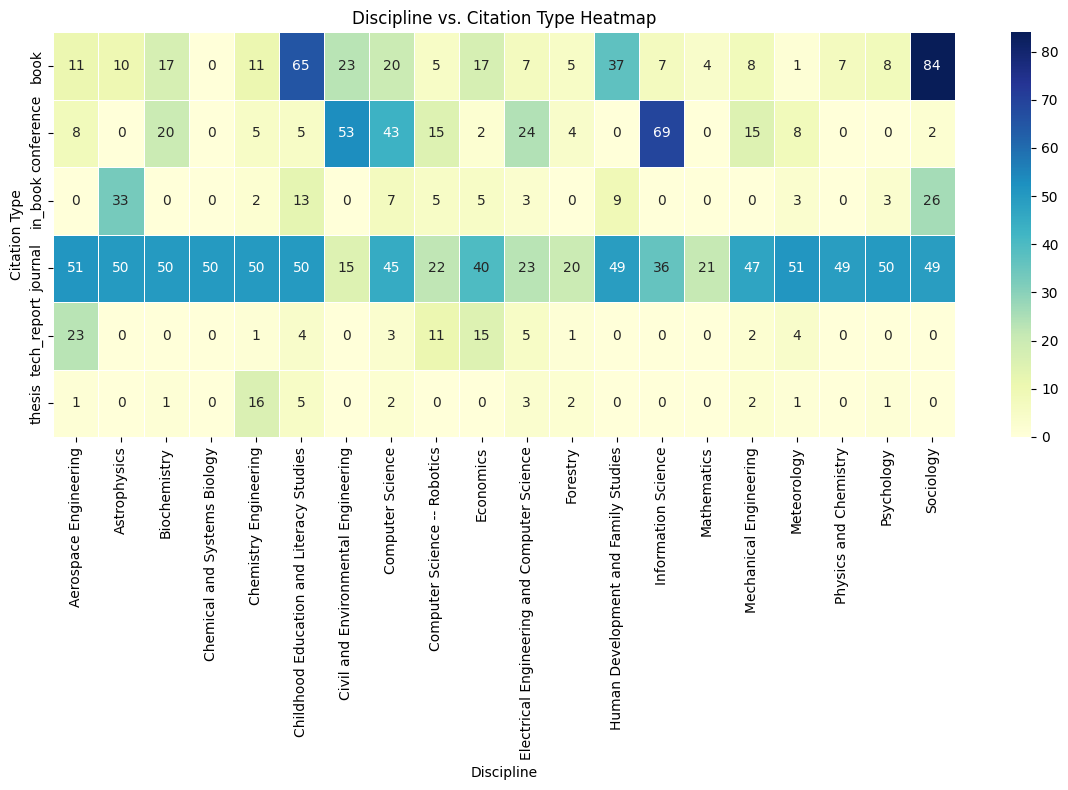

In [13]:
citetype_discipline = pd.crosstab(df['Mannual_ann'], df['Discipline'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(citetype_discipline, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Discipline vs. Citation Type Heatmap')
plt.xlabel('Discipline')
plt.ylabel('Citation Type')
plt.tight_layout()
plt.show()

## ETDCite -- Parsing Json Line File (output of Doccano annotator tool)

In [5]:
import jsonlines
import pandas as pd

# File path to your JSONL file
jsonl_file_path = 'ETDCite_ann.jsonl'
csv_file_path = 'ETDCite_annotated_data.csv'

# List to store the data
data = []

# Read the JSONL file
with jsonlines.open(jsonl_file_path) as reader:
    for obj in reader:
        text = obj['text']
        annotations = obj['label']

        # Initialize a dictionary to hold label types and their corresponding text
        annotation_dict = {
            'author': [],
            'title': [],
            'container-title': [],
            'publisher': [],
            'editor': [],
            'issued': []
        }

        # Populate the dictionary with annotations
        for start, end, label_type in annotations:
            annotated_text = text[start:end].strip()
            if label_type in annotation_dict:
                annotation_dict[label_type].append(annotated_text)

        # Concatenate annotated texts for each label type
        for label_type in annotation_dict:
            annotation_dict[label_type] = '; '.join(annotation_dict[label_type])

        # Append the dictionary to the data list
        data.append(annotation_dict)

# Convert list to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv(csv_file_path, index=False, encoding='utf-8')

print(f"Annotations have been saved to {csv_file_path}")

Annotations have been saved to ETDCite_annotated_data.csv


In [6]:
df

,author,title,container-title,publisher,editor,issued
0,"Al-Sulaimani, G., and Roessett, J. M.",Design Spectra for Degrading Systems,Journal of Structural Engineering,ASCE,,December 1985
1,"Bazzurro, P., and Cornell, C. A.",Seismic Hazard Analysis of Nonlinear Structure...,Journal of Structural Engineering,ASCE,,November 1994
2,"Bea, R. G., Audibert, J. M., and Akky, M. R.",Earthquake Response of Offshore Platforms,Journal of the Structural Division,ASCE,,"February, 1979"
3,"Bea, R. G., Mortazavi, M. M., and Loch, K. J.",Evaluation of Storm Loadings and Capacities of...,Journal of Waterway. Port. Coastal and Ocean E...,ASCE,,March/April 1997
4,"Biggs, J. M., and Roesset, J. M.",Seismic Analysis of Equipment Mounted on a Mas...,Seismic Design of Nuclear Power Plants,MTT Press,R. J. Hansen,1970
...,...,...,...,...,...,...
1645,"Zhu, N.",The effects of teachers' flow experiences on t...,Unpublished doctoral dissertation,San Diego State University & University of San...,,2001
1646,"Mcfarlane, D. C.",Interruption of people in human-computer inter...,PhD thesis,,,1998
1647,"Hansen, A. E.",Development of a Regional Lightning NOx Parame...,Ph.D. dissertation,The Florida State University,,2012
1648,"Huber, D.A.",Optimal mating designs and optimal tehcni...,Ph. D. dissertation,University of Florida,,1993
